In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
df = pd.read_csv("train.csv", nrows = 10000)

In [3]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                10000 non-null  object 
 1   fare_amount        10000 non-null  float64
 2   pickup_datetime    10000 non-null  object 
 3   pickup_longitude   10000 non-null  float64
 4   pickup_latitude    10000 non-null  float64
 5   dropoff_longitude  10000 non-null  float64
 6   dropoff_latitude   10000 non-null  float64
 7   passenger_count    10000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,10000.0,11.235464,9.584258,-2.900000,6.000000,8.500000,12.500000,180.000000
pickup_longitude,10000.0,-72.466660,10.609729,-74.438233,-73.992058,-73.981758,-73.966925,40.766125
pickup_latitude,10000.0,39.920448,7.318932,-74.006893,40.734547,40.752693,40.767694,401.083332
dropoff_longitude,10000.0,-72.474094,10.579732,-74.429332,-73.991112,-73.980083,-73.963504,40.802437
dropoff_latitude,10000.0,39.893281,6.339919,-73.994392,40.735230,40.753738,40.768186,41.366138
passenger_count,10000.0,1.644700,1.271229,0.000000,1.000000,1.000000,2.000000,6.000000


## Looking at the data

<AxesSubplot:>

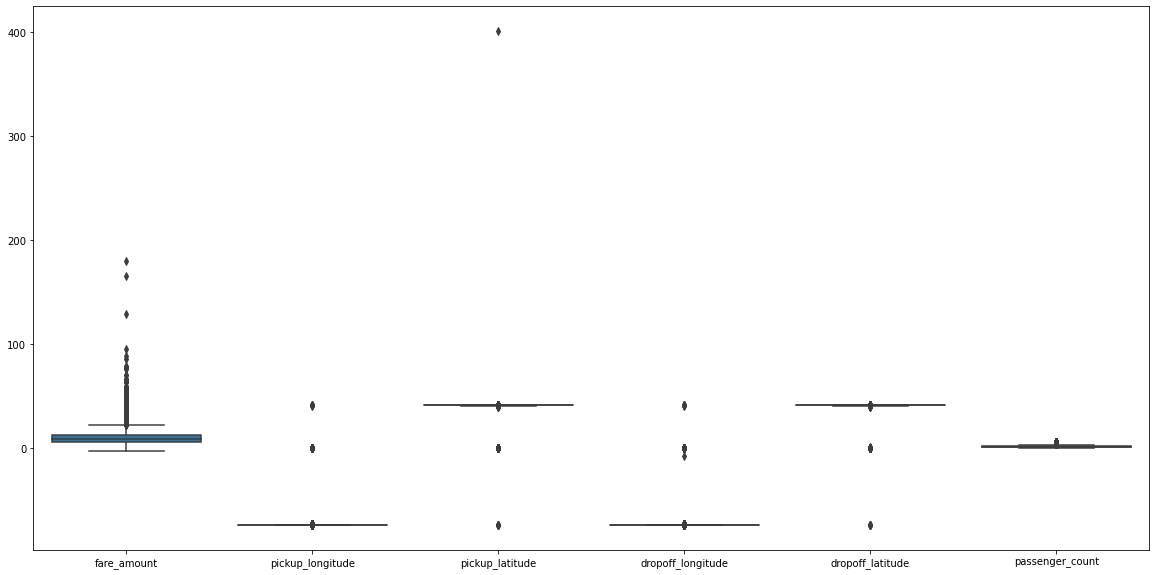

In [6]:
plt.figure(figsize = (20 , 10))
sns.boxplot(data = df)

Data have a lot outlier which needs to managed not removed.

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

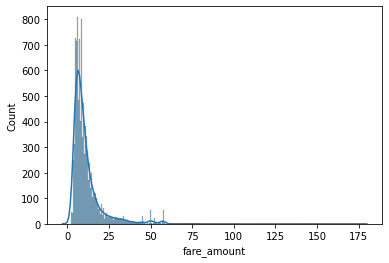

In [7]:
sns.histplot(x = df["fare_amount"], kde = True)

# OUTLIER HANDLING

In [8]:
df["passenger_count"].unique()

array([1, 2, 3, 6, 5, 4, 0], dtype=int64)

In [9]:
df["pickup_latitude"].unique()

array([40.721319, 40.711303, 40.76127 , ..., 40.729071, 40.735652,
       40.7517  ])

In [10]:
df_zero = df[(df["pickup_latitude"]==0)&(df["dropoff_latitude"]==0)&(df["pickup_longitude"] == 0)&(df["dropoff_longitude"]==0)]
df_zero.shape

(186, 8)

In [11]:
df.drop(df_zero.index.values, inplace = True)

In [12]:
df.reset_index(drop = True)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
9809,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9810,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9811,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2
9812,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00 UTC,-73.992548,40.735652,-73.998802,40.723085,1


In [13]:
df_zero_passenger = pd.crosstab(df["fare_amount"], df["passenger_count"])
df_zero_passenger

passenger_count,0,1,2,3,4,5,6
fare_amount,,,,,,,
-2.90,0,1,0,0,0,0,0
-2.50,0,1,0,0,0,0,0
0.01,0,1,0,0,0,0,0
2.50,1,35,2,2,0,1,0
2.90,0,17,4,0,0,2,0
...,...,...,...,...,...,...,...
85.50,0,1,0,0,0,0,0
88.00,0,1,0,0,0,0,0
95.00,0,0,1,0,0,0,0


In [14]:
df_passenger_zero  = df[df["passenger_count"] == 0]

In [15]:
df.drop(df_passenger_zero.index, inplace = True)

In [16]:
df.shape

(9776, 8)

In [17]:
negative_fare = df[df["fare_amount"] < 0]
df.drop(negative_fare.index.values, inplace = True)

In [18]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
9995,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2
9998,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00 UTC,-73.992548,40.735652,-73.998802,40.723085,1


In [19]:
# sns.pairplot(data =df)

In [20]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [21]:
temp_df = df[(df["pickup_latitude"]<min_latitude)|(df["dropoff_latitude"]<min_latitude)|(df["pickup_latitude"]>max_latitude)| (df["dropoff_latitude"]>max_latitude)|(df["pickup_longitude"]<min_longitude)|(df["dropoff_longitude"]<min_longitude)|(df["pickup_longitude"]>max_longitude)|(df["dropoff_longitude"]>max_longitude)]
df.drop(temp_df.index, inplace = True)

In [22]:
df = df[df["fare_amount"]>0]

In [23]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
9995,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9996,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1
9997,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17 UTC,-73.992093,40.729071,-73.974470,40.763050,2
9998,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00 UTC,-73.992548,40.735652,-73.998802,40.723085,1


## Feature Engineering

In [24]:
import calendar
df["pickup_datetime"]=pd.to_datetime(df['pickup_datetime'])
df["day"] = df["pickup_datetime"].apply(lambda x:x.day)
df["hour"] = df["pickup_datetime"].apply(lambda x:x.hour)
df["weekday"] = df["pickup_datetime"].apply(lambda x:x.isoweekday())#monday is 1 and sunday is 0
df["month"] = df["pickup_datetime"].apply(lambda x:x.month)
df["year"] = df["pickup_datetime"].apply(lambda x:x.year)

In [25]:
df1 = df.drop(["key", "pickup_datetime"], axis = 1)

In [26]:
df.reset_index(drop = True, inplace = True)

In [27]:
df.head(20)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,6,9,4,1,2011
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,20,20,2,11,2012
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,4,17,3,1,2012
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1,3,13,1,12,2012
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2,1,3,9,2009


In [28]:
def distance(data):
    R = 6400 #metres
    lat1 = data["pickup_latitude"]
    lat2 = data["dropoff_latitude"]
    lon1 = data["pickup_longitude"]
    lon2 = data["dropoff_longitude"]
    d = []
    for i in range(len(lat1)):
        φ1 = lat1[i] * math.pi/180 # φ, λ in radians
        φ2 = lat2[i] * math.pi/180
        Δφ = (lat2[i]-lat1[i]) * math.pi/180
        Δλ = (lon2[i]-lon1[i]) * math.pi/180
        a = (math.sin(Δφ/2) * math.sin(Δφ/2) + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ/2) * math.sin(Δλ/2))
        c = 2 * math.asin(math.sqrt(a))
        d.append(R * c) #in metres
    return d

In [29]:
df["distance"] = distance(df)

In [30]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,1.035456
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,8.488598
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,1.395850
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,2.812012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,2.008257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00+00:00,-73.988277,40.748970,-73.963712,40.773958,2,26,10,3,10,2011,3.479981
9742,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00+00:00,-74.002112,40.748727,-73.992467,40.756252,1,16,15,5,12,2011,1.171582
9743,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17+00:00,-73.992093,40.729071,-73.974470,40.763050,2,16,22,6,11,2013,4.077978
9744,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00+00:00,-73.992548,40.735652,-73.998802,40.723085,1,28,11,4,1,2010,1.500251


## UNIVARIATE ANALYSIS

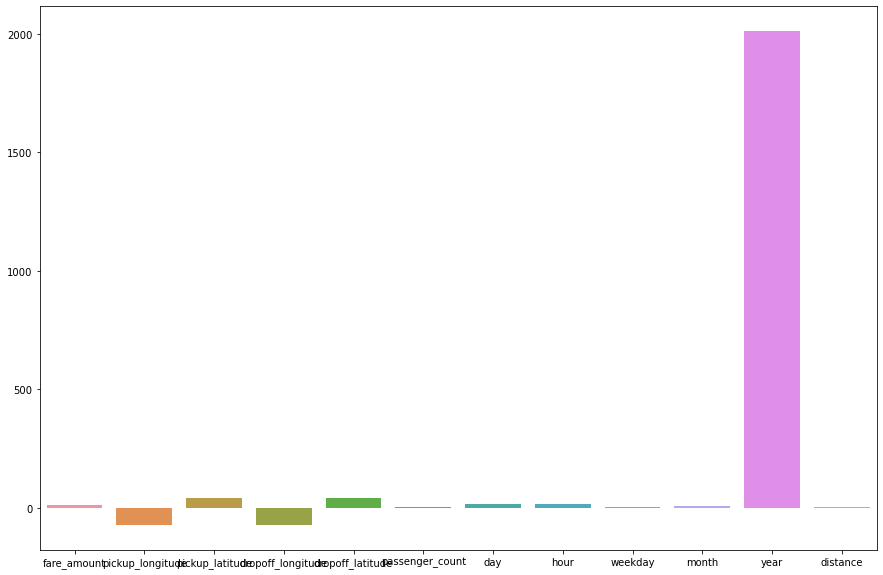

In [31]:
plt.figure(figsize = (15,10))
sns.barplot(data = df)
plt.show()

<AxesSubplot:>

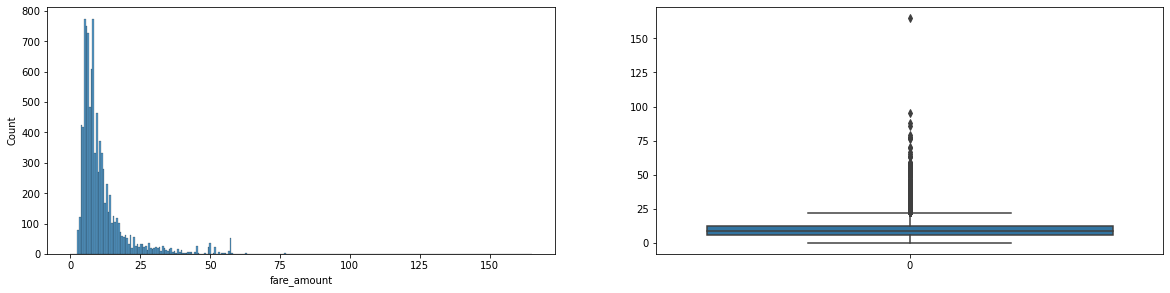

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(data = df["fare_amount"])
plt.subplot(2,2,2)
sns.boxplot(data = df["fare_amount"])

<AxesSubplot:>

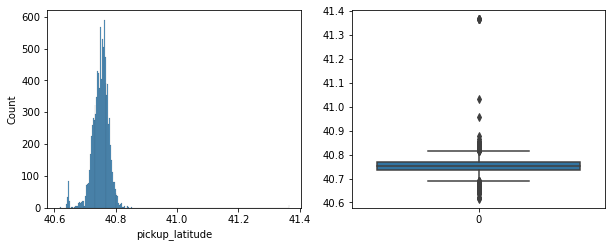

In [33]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data = df["pickup_latitude"])
plt.subplot(2,2,2)
sns.boxplot(data = df["pickup_latitude"])

<AxesSubplot:>

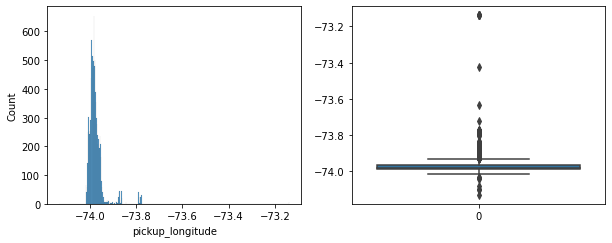

In [34]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data = df["pickup_longitude"])
plt.subplot(2,2,2)
sns.boxplot(data = df["pickup_longitude"])

<AxesSubplot:>

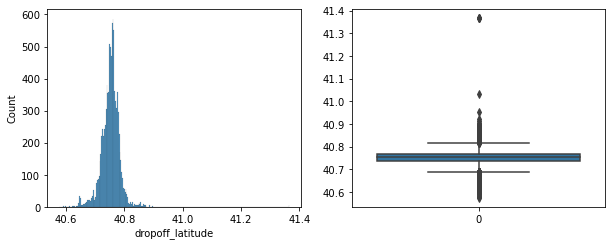

In [35]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data = df["dropoff_latitude"])
plt.subplot(2,2,2)
sns.boxplot(data = df["dropoff_latitude"])

<AxesSubplot:>

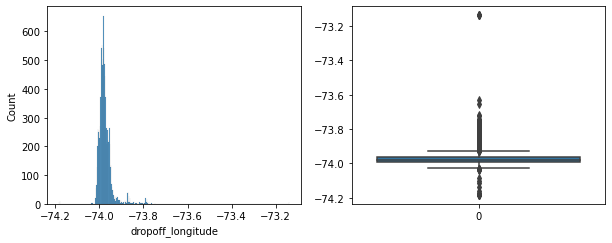

In [36]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data = df["dropoff_longitude"])
plt.subplot(2,2,2)
sns.boxplot(data = df["dropoff_longitude"])

<AxesSubplot:>

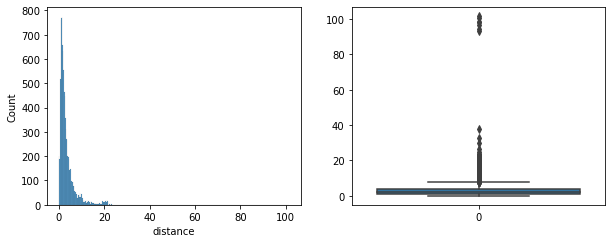

In [37]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(data = df["distance"])
plt.subplot(2,2,2)
sns.boxplot(data = df["distance"])

## Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='fare_amount'>

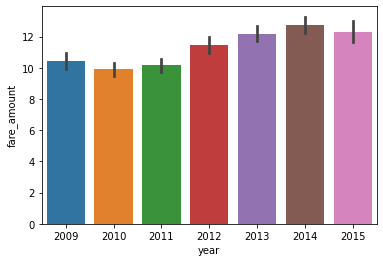

In [38]:
sns.barplot(x = df["year"], y = df["fare_amount"])

<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

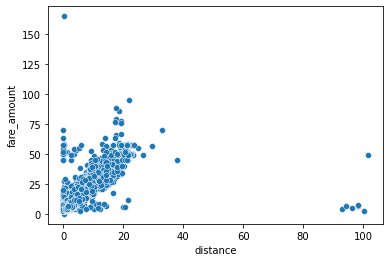

In [39]:
sns.scatterplot(y = df["fare_amount"], x = df["distance"])

In [40]:
df = df[df["fare_amount"] < 150]

In [41]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,1.035456
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,8.488598
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,1.395850
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,2.812012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,2.008257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00+00:00,-73.988277,40.748970,-73.963712,40.773958,2,26,10,3,10,2011,3.479981
9742,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00+00:00,-74.002112,40.748727,-73.992467,40.756252,1,16,15,5,12,2011,1.171582
9743,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17+00:00,-73.992093,40.729071,-73.974470,40.763050,2,16,22,6,11,2013,4.077978
9744,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00+00:00,-73.992548,40.735652,-73.998802,40.723085,1,28,11,4,1,2010,1.500251


In [42]:
df = df[df["distance"]<80]

In [43]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,1.035456
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,8.488598
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,1.395850
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,2.812012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,2.008257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,2011-10-26 10:44:00.00000086,11.7,2011-10-26 10:44:00+00:00,-73.988277,40.748970,-73.963712,40.773958,2,26,10,3,10,2011,3.479981
9742,2011-12-16 15:37:00.000000179,5.7,2011-12-16 15:37:00+00:00,-74.002112,40.748727,-73.992467,40.756252,1,16,15,5,12,2011,1.171582
9743,2013-11-16 22:47:17.0000001,12.0,2013-11-16 22:47:17+00:00,-73.992093,40.729071,-73.974470,40.763050,2,16,22,6,11,2013,4.077978
9744,2010-01-28 11:38:00.00000022,6.5,2010-01-28 11:38:00+00:00,-73.992548,40.735652,-73.998802,40.723085,1,28,11,4,1,2010,1.500251


<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

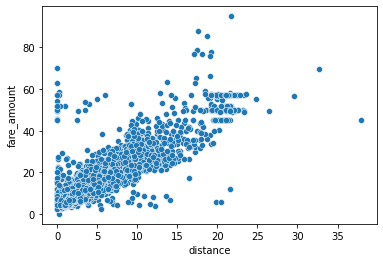

In [44]:
sns.scatterplot(y = df["fare_amount"], x = df["distance"])

In [45]:
df = df[df["distance"] != 0]
df.shape
## MAKING DATA MORE ROBUST WHILE ANALYZING

(9647, 14)

<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

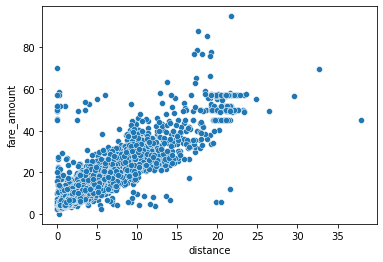

In [46]:
sns.scatterplot(y = df["fare_amount"], x = df["distance"])

<AxesSubplot:xlabel='weekday', ylabel='fare_amount'>

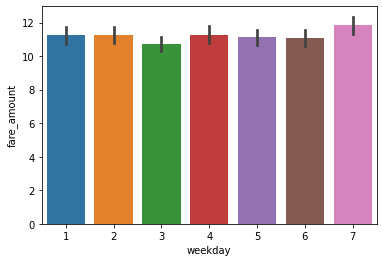

In [47]:
sns.barplot(y = df["fare_amount"], x = df["weekday"])

<AxesSubplot:xlabel='month', ylabel='fare_amount'>

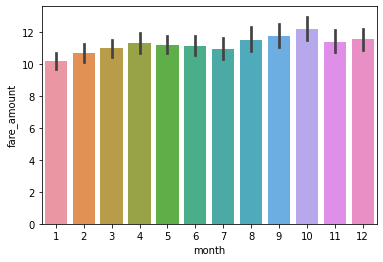

In [48]:
sns.barplot(y = df["fare_amount"], x = df["month"])

## Model Building

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [50]:
X = df.drop(["fare_amount","pickup_datetime","key"], axis = 1)
y = df["fare_amount"]
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year,distance
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,1.035456
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,8.488598
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,1.395850
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,2.812012
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,2.008257
...,...,...,...,...,...,...,...,...,...,...,...
9741,-73.988277,40.748970,-73.963712,40.773958,2,26,10,3,10,2011,3.479981
9742,-74.002112,40.748727,-73.992467,40.756252,1,16,15,5,12,2011,1.171582
9743,-73.992093,40.729071,-73.974470,40.763050,2,16,22,6,11,2013,4.077978
9744,-73.992548,40.735652,-73.998802,40.723085,1,28,11,4,1,2010,1.500251


In [51]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 101) 

## Linear Regression Model

In [52]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() 

In [53]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [54]:
y_predict_lr = lr_model.predict(x_val)
y_predict_lr

array([ 6.10445976, 13.1891734 ,  7.82004294, ...,  7.25137869,
        4.29058547, 12.12352024])

In [55]:
y_val

2646     5.7
7340    10.9
6157     6.0
8083    14.1
4740    14.5
        ... 
3132    10.5
5200    17.5
1494     9.7
2019     4.1
9650    11.0
Name: fare_amount, Length: 1930, dtype: float64

## EVALUATING LINEAR REGRESSION

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
print("MAE: ", mean_absolute_error(y_val,y_predict_lr))
print("MSE: ", mean_squared_error(y_val,y_predict_lr))
print("MAPE: ", mean_absolute_percentage_error(y_val,y_predict_lr))
print("RMSE: ", ( mean_squared_error(y_val,y_predict_lr))**(1/2))
print("R-square: ", r2_score(y_val,y_predict_lr))

MAE:  2.1816954545312512
MSE:  18.413811428173556
MAPE:  0.5224833935222977
RMSE:  4.2911317188095675
R-square:  0.7946719763741614


## KNN

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knn_model = KNeighborsRegressor()
grid_params = { 'n_neighbors' : [3, 5,7,9,11,13,15, 19],
               'metric' : ['minkowski','euclidean','manhattan']}
knn_cv = GridSearchCV(knn_model, grid_params, cv=10)

In [59]:
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19]})

In [60]:
knn_cv.best_params_

{'metric': 'minkowski', 'n_neighbors': 13}

In [61]:
knn_model_best = KNeighborsRegressor(metric = 'minkowski', n_neighbors = 13)

In [62]:
knn_model_best.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [63]:
y_predict_knn = knn_model_best.predict(x_val)

In [64]:
y_predict_knn

array([ 6.50769231, 10.68461538,  6.56923077, ...,  6.19230769,
        6.03076923, 10.13846154])

In [65]:
y_val

2646     5.7
7340    10.9
6157     6.0
8083    14.1
4740    14.5
        ... 
3132    10.5
5200    17.5
1494     9.7
2019     4.1
9650    11.0
Name: fare_amount, Length: 1930, dtype: float64

## EVALUATING KNN

In [66]:
print("MAE: ", mean_absolute_error(y_val,y_predict_knn))
print("MSE: ", mean_squared_error(y_val,y_predict_knn))
print("MAPE: ", mean_absolute_percentage_error(y_val,y_predict_knn))
print("RMSE: ", ( mean_squared_error(y_val,y_predict_knn))**(1/2))
print("R-square: ", r2_score(y_val,y_predict_knn))

MAE:  2.586232363491431
MSE:  21.45727491154919
MAPE:  0.7082514649962969
RMSE:  4.632199791842877
R-square:  0.760735040262021


## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt_model_best = DecisionTreeRegressor(criterion = "squared_error",max_depth = 5, min_samples_split = 4, min_samples_leaf = 4)

In [68]:
dt_model_best.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [69]:
y_predict_dt = dt_model_best.predict(x_val)

In [70]:
y_predict_dt

array([ 6.95510708, 12.99825581,  5.5574933 , ...,  7.56238859,
        5.5574933 , 10.86366947])

In [71]:
y_val

2646     5.7
7340    10.9
6157     6.0
8083    14.1
4740    14.5
        ... 
3132    10.5
5200    17.5
1494     9.7
2019     4.1
9650    11.0
Name: fare_amount, Length: 1930, dtype: float64

## EVALUATING DECISION FOREST

In [72]:
print("MAE: ", mean_absolute_error(y_val,y_predict_dt))
print("MSE: ", mean_squared_error(y_val,y_predict_dt))
print("MAPE: ", mean_absolute_percentage_error(y_val,y_predict_dt))
print("RMSE: ", ( mean_squared_error(y_val,y_predict_dt))**(1/2))
print("R-square: ", r2_score(y_val,y_predict_dt))

MAE:  2.1663074344042585
MSE:  17.38376702067305
MAPE:  0.49263030362478166
RMSE:  4.169384489426833
R-square:  0.8061577561250788


## RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
params = {"n_estimators":[50,100,150,200],"max_depth":range(3,15), 'max_features' : [0.1,0.2,0.3,0.5]}
rf_cv = GridSearchCV(rf_model, params, cv = 10)

In [75]:
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(3, 15),
                         'max_features': [0.1, 0.2, 0.3, 0.5],
                         'n_estimators': [50, 100, 150, 200]})

In [76]:
rf_cv.best_params_

{'max_depth': 14, 'max_features': 0.5, 'n_estimators': 100}

In [80]:
rf_model_best = RandomForestRegressor(max_depth = 14, max_features = 0.5, n_estimators = 100)

In [82]:
rf_model_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=14, max_features=0.5)

In [83]:
y_predict_rf = rf_model_best.predict(x_val)

## EVALUATIONS

In [84]:
print("MAE: ", mean_absolute_error(y_val,y_predict_rf))
print("MSE: ", mean_squared_error(y_val,y_predict_rf))
print("MAPE: ", mean_absolute_percentage_error(y_val,y_predict_rf))
print("RMSE: ", ( mean_squared_error(y_val,y_predict_rf))**(1/2))
print("R-square: ", r2_score(y_val,y_predict_rf))

MAE:  1.9368117543152563
MSE:  13.979036692098456
MAPE:  0.6211416297122851
RMSE:  3.7388549974689385
R-square:  0.8441230927460217


R2 score is highest for the Random Forest, showing that it is fitting well. Also, Lowest RMSE is given by the RandomForest Model. Hence, we can conclude that Random Forest model can be chosen as the best model to predict the cab price.